In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196 entries, 0 to 12195
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  12196 non-null  object
 1   class        12196 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 190.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  5227 non-null   object
dtypes: object(1)
memory usage: 41.0+ KB


In [6]:
train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [7]:
train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [8]:
X = []
for image_name in train['image_names']:
    img = plt.imread('images/' + image_name)
    X.append(img)
X = np.array(X)

In [9]:
X.shape

(12196, 224, 224, 3)

In [10]:
y = train['class']

In [11]:
y.shape

(12196,)

In [12]:
rng = np.random.default_rng()

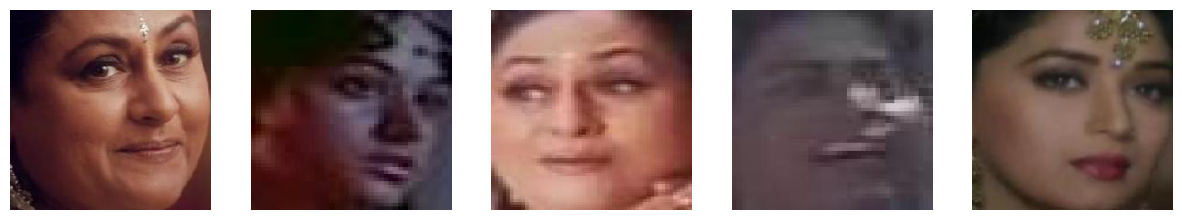

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,20))
for i in range(5):
    ax[i].imshow(X[rng.integers(X.shape[0])])
    ax[i].axis('off')

# Processing

In [14]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])

In [15]:
X.shape

(12196, 150528)

In [16]:
X = X.astype('float32')

In [16]:
X.min(), X.max()

(0, 255)

In [17]:
X = X / X.max()

In [18]:
X.min(), X.max()

(0.0, 1.0)

In [18]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, det_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [19]:
import sys

In [20]:
sys.getsizeof(X) / 2**30

6.8390351459383965

In [32]:
sys.getsizeof(X_train) / 2**30

9.574424855411053

In [36]:
%xdel X

NameError: name 'X' is not defined


In [26]:
%reset_selective -f '^X$'

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [22]:
X_train.shape, X_test.shape

((8537, 150528), (3659, 150528))

# Model

In [47]:
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [56]:
model=Sequential()
model.add(Dense(units=50, activation='relu', kernel_initializer=HeNormal(), input_shape=(X.shape[1],)))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())
model.add(Dense(units=50, activation='relu', kernel_initializer=HeNormal()))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

In [57]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                7526450   
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 50)               200       
 hNormalization)                                      

In [58]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=[keras.metrics.BinaryAccuracy()])

In [59]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy', min_delta=.001, patience=5, mode='max', baseline=0.5),
             ModelCheckpoint(filepath='model.hdf5', monitor='val_binary_accuracy', mode='max', save_best_only=True)]

In [60]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=20, callbacks=callbacks, validation_data=(X_test, y_test), )

Epoch 1/20
9/9 [==============================] - 33s 3s/step - loss: 0.7507 - binary_accuracy: 0.5946 - val_loss: 3.7107 - val_binary_accuracy: 0.4846
Epoch 2/20
9/9 [==============================] - 21s 2s/step - loss: 0.6695 - binary_accuracy: 0.6390 - val_loss: 1.3667 - val_binary_accuracy: 0.5083
Epoch 3/20
9/9 [==============================] - 19s 2s/step - loss: 0.6406 - binary_accuracy: 0.6562 - val_loss: 0.7518 - val_binary_accuracy: 0.6218
Epoch 4/20
9/9 [==============================] - 21s 2s/step - loss: 0.6104 - binary_accuracy: 0.6728 - val_loss: 0.6367 - val_binary_accuracy: 0.6835
Epoch 5/20
9/9 [==============================] - 18s 2s/step - loss: 0.5897 - binary_accuracy: 0.6949 - val_loss: 0.6659 - val_binary_accuracy: 0.6521
Epoch 6/20
9/9 [==============================] - 18s 2s/step - loss: 0.5798 - binary_accuracy: 0.7059 - val_loss: 0.6046 - val_binary_accuracy: 0.7002
Epoch 7/20
9/9 [==============================] - 20s 2s/step - loss: 0.5523 - binary_ac

In [61]:
model = load_model('model.hdf5')

In [62]:
prediction = model.predict(X_test)

115/115 [==============================] - 2s 18ms/step


In [63]:
prediction_cat = (prediction >= 0.5).astype(int)

In [64]:
print(classification_report(y_test, prediction_cat))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1772
           1       0.83      0.80      0.81      1887

    accuracy                           0.81      3659
   macro avg       0.81      0.81      0.81      3659
weighted avg       0.81      0.81      0.81      3659



In [65]:
history_df = pd.DataFrame(history.history)

In [66]:
history_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.750653,0.594588,3.710688,0.484559
1,0.669453,0.638983,1.366730,0.508336
2,0.640605,0.656202,0.751849,0.621755
3,0.610411,0.672836,0.636675,0.683520
4,0.589724,0.694858,0.665873,0.652091


Text(0.5, 0.01, 'epochs')

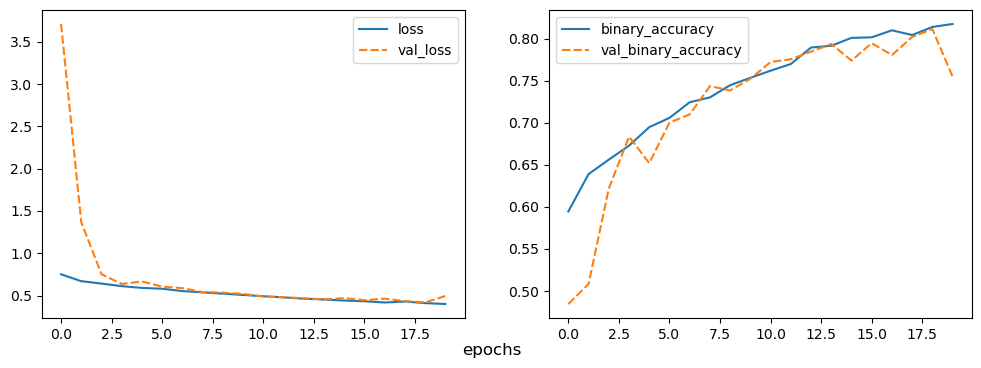

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.lineplot(history_df[['loss', 'val_loss']], ax=ax1)
sns.lineplot(history_df[['binary_accuracy', 'val_binary_accuracy']], ax=ax2)
fig.supxlabel('epochs')

actual class 0, predicted probability 0.20027565956115723


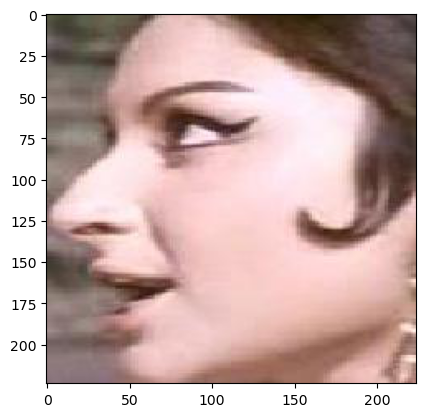

In [68]:
index = rng.integers(X_test.shape[0])
plt.imshow(np.reshape(X[index], (224,224,3)))
print(f'actual class {train["class"].loc[index]}, predicted probability {prediction[index][0]}')

# test

In [69]:
test_X = []
for image_name in test['image_names']:
    img = plt.imread('images/' + image_name)
    test_X.append(img)
test_X = np.array(test_X)

In [70]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1]*test_X.shape[2]*test_X.shape[3])

In [71]:
test_X.shape

(5227, 150528)

In [16]:
test_X.min(), test_X.max()

(0, 255)

In [72]:
test_X = test_X / test_X.max()

In [18]:
test_X.min(), test_X.max()

(0.0, 1.0)

In [73]:
test_pred = model.predict(test_X)

164/164 [==============================] - 5s 28ms/step


In [74]:
test_pred_cat = (test_pred >= 0.5).astype(int)

In [75]:
test['image_names']

0        5603.jpg
1        1286.jpg
2        9815.jpg
3        8865.jpg
4        9306.jpg
          ...    
5222    13040.jpg
5223     1335.jpg
5224    11246.jpg
5225     9052.jpg
5226     9574.jpg
Name: image_names, Length: 5227, dtype: object

In [76]:
result = pd.DataFrame({'image_names':test['image_names'], 'class': test_pred_cat.flatten()})

In [77]:
result.to_csv('submission.csv', index=False)